In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# 1. Cargar el conjunto de datos con los parámetros adecuados

In [2]:

file_path= 'data/data.csv'

df = pd.read_csv(file_path, 
                 sep=';', 
                 decimal=',', 
                 encoding='latin1', 
                 engine='python', 
                 on_bad_lines='skip')

# Si 'latin1' no funciona, prueba con 'utf-8' o 'cp1252'
# df = pd.read_csv('clientes.csv', sep=';', decimal=',', encoding='utf-8', engine='python', on_bad_lines='skip')
# df = pd.read_csv('clientes.csv', sep=';', decimal=',', encoding='cp1252', engine='python', on_bad_lines='skip')


# 2. Verificar que los datos se han cargado correctamente

In [3]:
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos anuales brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
0,CLI2,M,No,24,No,Funcionario,<10annos,Bajo,4,2000,Generacion Z,13945,Malaga,1.029,30,0,278,NaN
1,CLI3,F,Si,42,Si,Ingeniero,+20annos,Medio,3,1982,Millennials,118107,Salamanca,1.790,30,0,455,3.0
2,CLI4,F,Si,74,Si,Ingeniero,+20annos,Bajo,1,1950,Generacion X,53533,Burgos,1.326,50,0,380,1.0
3,CLI5,M,Si,74,Si,Servicios,+20annos,Alto,2,1950,Generacion X,82273,Gerona,0.779,50,1,387,3.0
4,CLI6,F,Si,44,Si,Otros,+20annos,Alto,6,1980,Generacion X,90776,ivila,1.767,30,1,299,NaN


In [4]:
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10806 entries, 0 to 10805
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         10806 non-null  object 
 1   Genero                     10806 non-null  object 
 2   Casado                     10616 non-null  object 
 3   Edad                       10806 non-null  int64  
 4   Graduado                   10703 non-null  object 
 5   Profesion                  10806 non-null  object 
 6   Experiencia laboral        10806 non-null  object 
 7   Gastoscore                 10806 non-null  object 
 8   Family_Size                10806 non-null  int64  
 9   anno_nacimiento            10806 non-null  int64  
 10  Generacion                 10806 non-null  object 
 11  Ingresos anuales brutos    10806 non-null  int64  
 12  Provincia                  10806 non-null  object 
 13  Digital_encuesta    

In [5]:
print("\nDescripción estadística:")
df.describe()


Descripción estadística:


,Edad,Family_Size,anno_nacimiento,Ingresos anuales brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
count,10806.000000,10806.000000,10806.000000,10806.000000,10806.000000,10806.000000,10806.000000,10806.000000,5099.000000
mean,47.920415,2.764390,1976.075236,56113.470387,1.724110,45.285027,0.297983,298.006293,2.219749
std,18.432100,1.548241,18.431804,35458.081118,2.087547,28.674032,0.457393,148.844349,1.404996
min,20.000000,1.000000,1926.000000,12003.000000,0.564000,30.000000,0.000000,30.000000,0.500000
25%,33.000000,2.000000,1966.000000,24986.250000,0.985000,30.000000,0.000000,177.000000,0.500000
50%,45.000000,2.000000,1979.000000,43628.000000,1.353000,30.000000,0.000000,289.000000,3.000000
75%,58.000000,4.000000,1991.000000,86678.500000,1.698000,50.000000,1.000000,401.000000,3.000000
max,98.000000,9.000000,2004.000000,129963.000000,15.215000,200.000000,1.000000,600.000000,4.000000


# 3. Limpieza de Datos

In [6]:
# Identificar y eliminar duplicados
df.drop_duplicates(inplace=True)

In [7]:
# Corregir valores inconsistentes o errores tipográficos si es necesario
# Por ejemplo, estandarizar valores de la columna 'Género'
df['Genero'] = df['Genero'].str.lower()
df['Genero'] = df['Genero'].replace({'masculino': 'M', 'femenino': 'F'})
df['Genero'] = df['Genero'].replace({'m': 'M', 'f': 'F'})

# 4. Manejo de Valores Faltantes

In [8]:
# Verificar valores faltantes
print("\nValores faltantes por columna:")
df.isnull().sum()


Valores faltantes por columna:


ID                              0
Genero                          0
Casado                        190
Edad                            0
Graduado                      103
Profesion                       0
Experiencia laboral             0
Gastoscore                      0
Family_Size                     0
anno_nacimiento                 0
Generacion                      0
Ingresos anuales brutos         0
Provincia                       0
Digital_encuesta                0
Gasto_medio_mensual_cuota       0
Abandono                        0
Dias_cliente                    0
Campanna_anno                5707
dtype: int64

In [9]:
# Imputación de valores faltantes
df['Campanna_anno'].fillna(0, inplace=True)
# Para variables numéricas, podemos usar la mediana
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\mglez\AppData\Local\Temp\ipykernel_3936\530110621.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Campanna_anno'].fillna(0, inplace=True)
C:\Users\mglez\AppData\Local\Temp\ipykernel_3936\530110621.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [10]:
# Para variables categóricas, podemos usar el valor más frecuente (moda)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\mglez\AppData\Local\Temp\ipykernel_3936\427326866.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


# 5. Codificación de Variables Categóricas

In [11]:
# Identificar columnas categóricas
categorical_cols = ['Genero', 'Casado', 'Graduado', 'Profesion', 'Experiencia laboral', 'Generacion', 'Provincia', 'Gastoscore']

In [12]:
# Usar Label Encoding para variables ordinales si aplica
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

## Correlacion

In [13]:
df_1 = df.drop(columns=['ID'])

In [14]:
correlation_matrix = df_1.corr()
print(correlation_matrix)

                             Genero    Casado      Edad  Graduado  Profesion  \
Genero                     1.000000  0.109137  0.025605 -0.038173   0.036455   
Casado                     0.109137  1.000000  0.559398  0.188879  -0.015649   
Edad                       0.025605  0.559398  1.000000  0.235249   0.157694   
Graduado                  -0.038173  0.188879  0.235249  1.000000  -0.207429   
Profesion                  0.036455 -0.015649  0.157694 -0.207429   1.000000   
Experiencia laboral       -0.002889 -0.551847 -0.767881 -0.349597   0.039334   
Gastoscore                 0.000352  0.125160 -0.129238  0.082744  -0.151056   
Family_Size                0.064961 -0.060645 -0.265853 -0.218886  -0.012134   
anno_nacimiento           -0.025437 -0.560012 -0.999415 -0.235902  -0.158008   
Generacion                -0.038776 -0.458809 -0.784002 -0.125003  -0.081698   
Ingresos anuales brutos    0.004920  0.395801  0.521973  0.245680  -0.038345   
Provincia                  0.008787  0.0

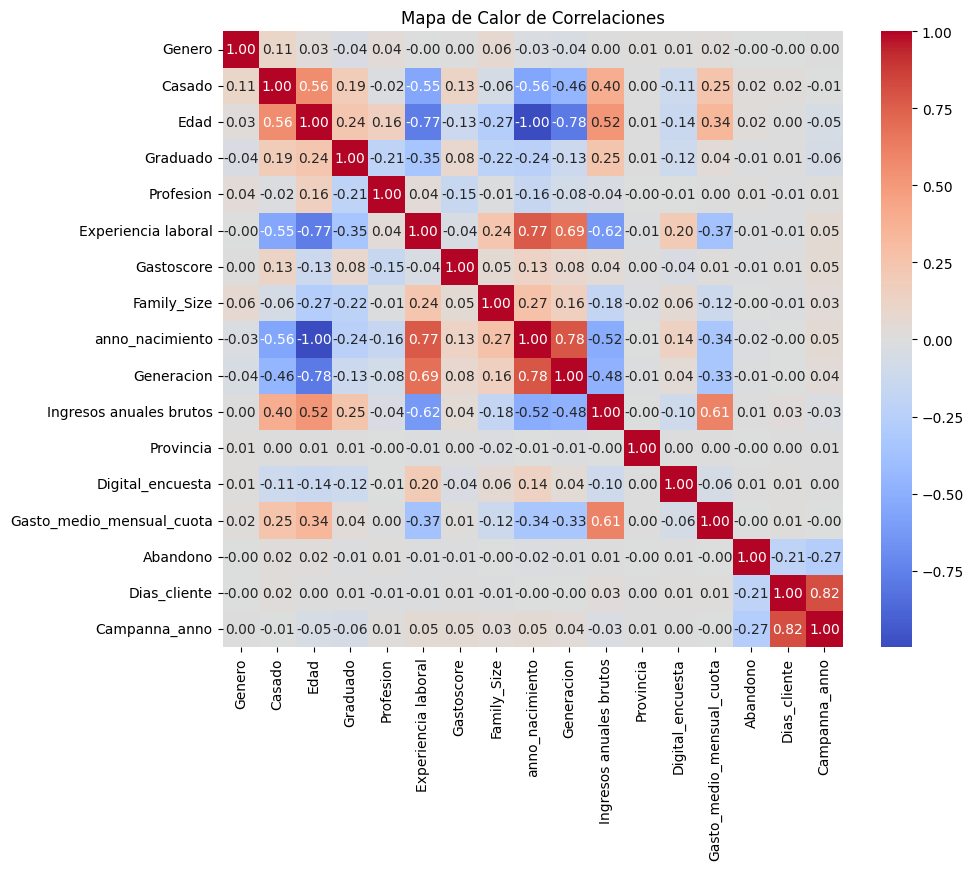

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

In [16]:
threshold = 0.5  # Cambia según el valor deseado
high_correlation = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

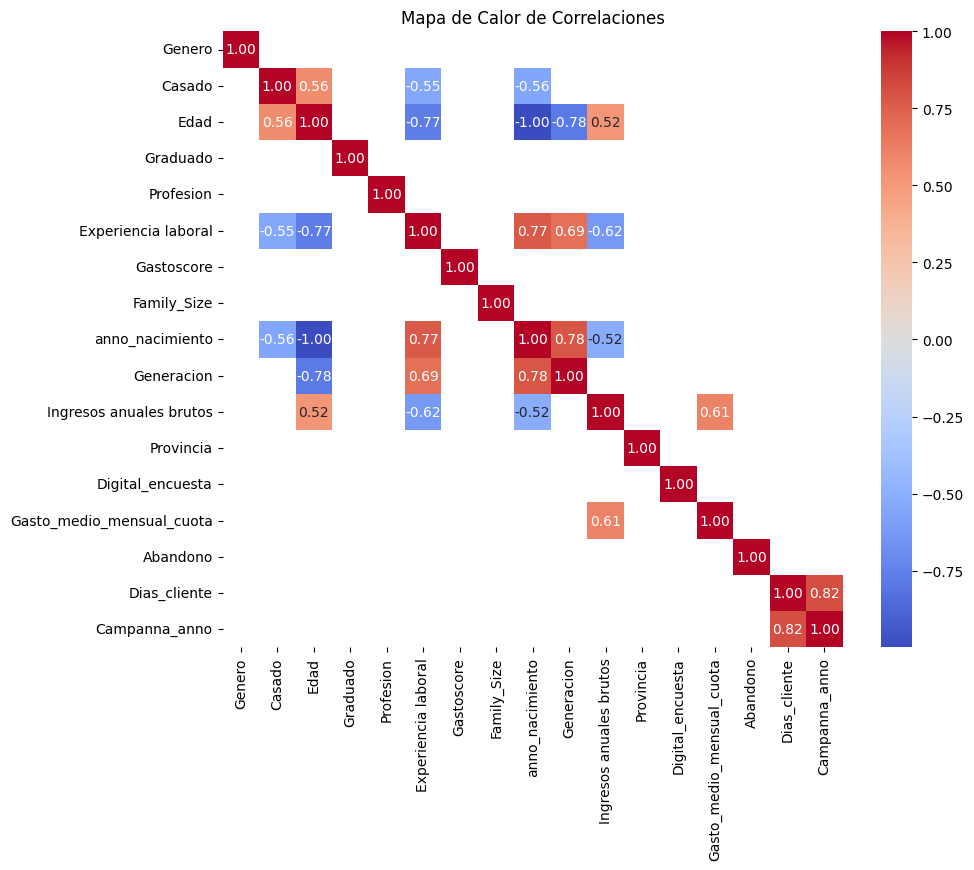

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(high_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

# 6. Normalización de Variables Numéricas

In [18]:
df = df.rename(columns={'Experiencia laboral':'experiencia_laboral',
                        'Ingresos anuales brutos':'ingresos_anuales_brutos'})

In [19]:
columns = ['Casado','Edad','experiencia_laboral','anno_nacimiento','Generacion','ingresos_anuales_brutos']
columns

['Casado',
 'Edad',
 'experiencia_laboral',
 'anno_nacimiento',
 'Generacion',
 'ingresos_anuales_brutos']

In [20]:
data = df[columns]

In [21]:
# Identificar columnas numéricas
numerical_cols = ['Edad', 'Gastoscore', 'Family_Size', 'anno_nacimiento', 'ingresos_anuales_brutos', 'Digital_encuesta', 'Gasto_medio_mensual_cuota', 'Dias_cliente', 'Campanna_anno']

In [22]:
# Usar estandarización
# Crear un objeto StandardScaler
scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler()
data[columns] = scaler.fit_transform(data[columns])

C:\Users\mglez\AppData\Local\Temp\ipykernel_3936\3024397597.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns] = scaler.fit_transform(data[columns])


# 7. Verificar el dataset preprocesado

In [23]:
print("\nDataset después del preprocesamiento:")
data.head()


Dataset después del preprocesamiento:


,Casado,Edad,experiencia_laboral,anno_nacimiento,Generacion,ingresos_anuales_brutos
0,-1.206842,-1.297819,1.715799,1.298075,0.224282,-1.189304
1,0.828609,-0.321216,-0.775758,0.321457,1.185260,1.748442
2,0.828609,1.414966,-0.775758,-1.414753,-0.736697,-0.072779
3,0.828609,1.414966,-0.775758,-1.414753,-0.736697,0.737793
4,0.828609,-0.212705,-0.775758,0.212944,-0.736697,0.977609


In [24]:
# Guardar el dataset preprocesado si es necesario
data.to_csv('datos_telecom_preprocesado_4.csv', index=False)